In [160]:
#Separate notebook to work on Topic Modelling with LDA
%pylab inline
from sys import platform
from pprint import pprint
import pandas as pd
from tqdm import trange

if platform == "win32":
    path = 'C:/Users/olive/'
elif platform == "darwin":
    path = '~/'
    
pd.options.mode.chained_assignment = None  # default='warn'

Populating the interactive namespace from numpy and matplotlib


/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
c_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/comments.csv')
s_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/submissions.csv')

s_df = s_df.sort_values(by='datetime')
c_df = c_df.sort_values(by='datetime')

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
comments = c_df.sample(50000)

comments = comments.reset_index().drop(columns=['id', 'datetime', 'sentiment', 'compound_score', 'submission_id', 'parent_id'], axis=1)

comments.head()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,processed_text,top_level
0,I wear a surgical mask on top of the respirato...,i wear a surgical mask on top of the respirato...,0
1,Well I doubt that will happen but it sure is p...,well i doubt that will happen but it sure is p...,0
2,"Hey man, things are rough right now but it doe...",hey man things are rough right now but it does...,0
3,such nonsense.\n\ngive your head a wobble.\n\n...,such nonsense\n\ngive your head a wobble\n\ni ...,0
4,Is the lockdown killing more people than COVID...,is the lockdown killing more people than covid...,0


In [186]:
# REMOVE EMAILS AND NEWLINE CHARACTERS

data = comments['processed_text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-186-9434b3e1a8c7>:6: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-186-9434b3e1a8c7>:9: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['i wear a surgical mask on top of the respirator keeps the respirator cleaner '
 'as i am reusing it i spray it with disinfectant at the end of the day']


/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


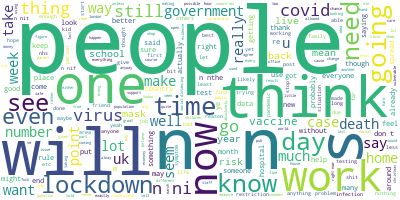

In [187]:
# EXPLORATORY ANALYSIS

from wordcloud import WordCloud

long_string = ','.join(list(comments['processed_text'].values))

wordcloud = WordCloud(background_color="white",
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue'
                     )

wordcloud.generate(long_string)

wordcloud.to_image()

In [188]:
# Tokenize words and more text clean-up

import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),
                                            deacc=True))
        
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['wear', 'surgical', 'mask', 'on', 'top', 'of', 'the', 'respirator', 'keeps', 'the', 'respirator', 'cleaner', 'as', 'am', 'reusing', 'it', 'spray', 'it', 'with', 'disinfectant', 'at', 'the', 'end', 'of', 'the', 'day']


In [189]:
#Bigram and Trigram Phrase Modelling

bigram = gensim.models.Phrases(data_words, 
                               min_count=5, 
                               threshold=100
                              )
trigram = gensim.models.Phrases(bigram[data_words], 
                                threshold=100
                               )

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['wear', 'surgical_mask', 'on', 'top', 'of', 'the', 'respirator', 'keeps', 'the', 'respirator', 'cleaner', 'as', 'am', 'reusing', 'it', 'spray', 'it', 'with', 'disinfectant', 'at', 'the', 'end', 'of', 'the', 'day']


In [190]:
#Remove Stopwords, Make Bigrams and Lemmantize

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from',
                   'subject', 
                   're', 
                   'edu', 
                   'use'])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
#Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
import spacy

data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load("en_core_web_sm", disable=['parser',
                                            'ner'])

data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:1])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['wear', 'surgical', 'mask', 'top', 'respirator', 'keep', 'respirator', 'clean', 'reusing', 'spray', 'disinfectant', 'end', 'day']]


In [193]:
#Data Tranformation: Corpus and Dictionary

import gensim.corpora as corpora

id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


In [194]:
# Building LDA model

def build_lda(num_topics):
    return gensim.models.LdaModel(corpus=corpus,
                                  id2word=id2word,
                                  num_topics=num_topics,
                                  random_state=100,
                                  update_every=1,
                                  chunksize=10000,
                                  iterations=200,
                                  passes=40,
                                  alpha='auto',
                                  per_word_topics=True)

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 20/20 [2:22:20<00:00, 427.01s/it]  


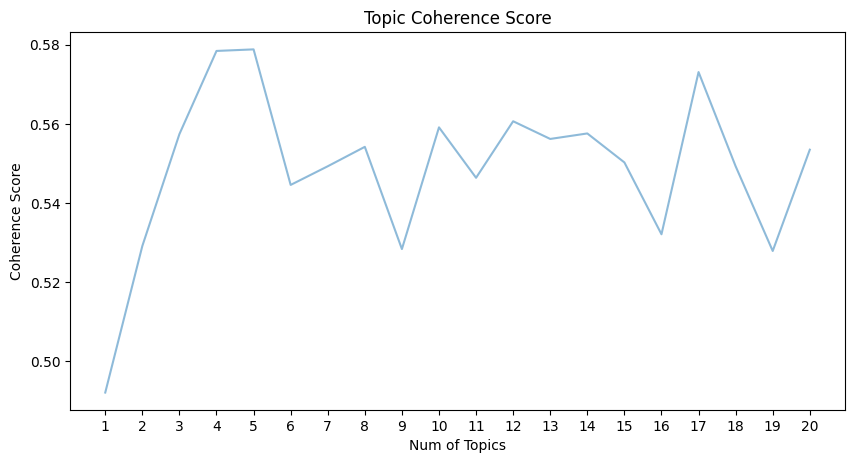

In [197]:
# METHOD FOR TESTING COHERENCE SCORE FOR DIFFERING NUMBERS OF TOPICS

from gensim.models import CoherenceModel

topic_coherence = []
num_topics = 20

for n in trange(1, num_topics + 1):
    
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=n,
                                       random_state=100,
                                       passes=40,
                                       iterations=200,
                                       chunksize=10000,
                                       alpha='auto',
                                       per_word_topics=True,
                                       eval_every=None
                                      )

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=data_lemmatized, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    
    topic_coherence.append(coherence_model_lda.get_coherence())


x = [i for i in range(1, num_topics + 1)]

fig, ax1 = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 5)

ax1.set_title('Topic Coherence Score')
ax1.set_xlabel('Num of Topics')
ax1.set_ylabel('Coherence Score')
ax1.set_xticks(x)
ax1.plot(x, topic_coherence, alpha=0.5)

In [45]:
three_topics_lda = build_lda(3)
three_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"work" + 0.031*"school" + 0.020*"home" + 0.016*"tier" + 0.013*"mask" + 0.011*"open" + 0.011*"kid" + 0.011*"close" + 0.010*"child" + 0.010*"go"'),
 (1,
  '0.026*"people" + 0.019*"get" + 0.017*"do" + 0.014*"go" + 0.012*"think" + 0.011*"say" + 0.010*"make" + 0.009*"know" + 0.009*"see" + 0.008*"s"'),
 (2,
  '0.024*"covid" + 0.022*"vaccine" + 0.018*"case" + 0.015*"test" + 0.014*"day" + 0.013*"number" + 0.013*"dose" + 0.012*"death" + 0.010*"https" + 0.010*"hospital"')]

In [100]:
four_topics_lda = build_lda(4)
four_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"lockdown" + 0.012*"country" + 0.009*"tier" + 0.009*"restriction" + 0.007*"london" + 0.006*"bad" + 0.006*"go" + 0.006*"week" + 0.005*"area" + 0.005*"measure"'),
 (1,
  '0.023*"people" + 0.017*"go" + 0.016*"get" + 0.011*"do" + 0.010*"work" + 0.008*"think" + 0.007*"time" + 0.006*"say" + 0.006*"need" + 0.006*"m"'),
 (2,
  '0.016*"death" + 0.014*"case" + 0.013*"test" + 0.012*"covid" + 0.012*"number" + 0.011*"day" + 0.008*"vaccine" + 0.008*"week" + 0.008*"people" + 0.006*"infection"'),
 (3,
  '0.015*"do" + 0.012*"people" + 0.011*"say" + 0.009*"make" + 0.009*"think" + 0.008*"government" + 0.008*"thank" + 0.007*"s" + 0.006*"m" + 0.006*"comment"')]

In [179]:
five_topics_lda = build_lda(5)
five_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.008*"fuck" + 0.006*"good" + 0.005*"people" + 0.005*"shit" + 0.005*"nhs" + 0.005*"fucking" + 0.004*"man" + 0.004*"tory" + 0.004*"service" + 0.004*"buy"'),
 (1,
  '0.019*"people" + 0.017*"go" + 0.017*"get" + 0.011*"do" + 0.011*"work" + 0.008*"think" + 0.008*"time" + 0.007*"see" + 0.007*"m" + 0.006*"home"'),
 (2,
  '0.014*"https" + 0.013*"day" + 0.011*"news" + 0.009*"post" + 0.009*"datum" + 0.008*"report" + 0.008*"coronavirus" + 0.008*"death" + 0.008*"case" + 0.007*"thank"'),
 (3,
  '0.017*"post" + 0.012*"question" + 0.011*"action" + 0.011*"bot" + 0.010*"concern" + 0.010*"coronavirusuk" + 0.010*"rule" + 0.010*"get" + 0.008*"moderator" + 0.008*"often"'),
 (4,
  '0.016*"case" + 0.015*"test" + 0.014*"people" + 0.012*"death" + 0.011*"covid" + 0.011*"number" + 0.009*"virus" + 0.008*"vaccine" + 0.007*"say" + 0.006*"lockdown"')]

In [113]:
six_topics_lda = build_lda(6)
six_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.019*"lockdown" + 0.017*"tier" + 0.013*"pub" + 0.012*"rule" + 0.012*"restriction" + 0.011*"london" + 0.008*"area" + 0.006*"protest" + 0.006*"go" + 0.005*"place"'),
 (1,
  '0.021*"people" + 0.020*"go" + 0.020*"get" + 0.012*"work" + 0.011*"do" + 0.008*"think" + 0.008*"time" + 0.008*"m" + 0.007*"see" + 0.007*"home"'),
 (2,
  '0.030*"test" + 0.025*"case" + 0.023*"day" + 0.020*"number" + 0.020*"death" + 0.016*"week" + 0.012*"positive" + 0.010*"https" + 0.010*"datum" + 0.008*"covid"'),
 (3,
  '0.019*"do" + 0.017*"thank" + 0.012*"post" + 0.011*"say" + 0.011*"comment" + 0.009*"make" + 0.008*"good" + 0.008*"s" + 0.007*"m" + 0.007*"think"'),
 (4,
  '0.010*"feel" + 0.010*"dose" + 0.009*"symptom" + 0.006*"vaccine" + 0.005*"fever" + 0.005*"smell" + 0.004*"taste" + 0.004*"pain" + 0.004*"trial" + 0.004*"use"'),
 (5,
  '0.021*"people" + 0.011*"virus" + 0.010*"do" + 0.009*"covid" + 0.009*"lockdown" + 0.008*"think" + 0.008*"say" + 0.007*"vaccine" + 0.007*"government" + 0.007*"die"')]

In [182]:
eight_topics_lda = build_lda(8)
eight_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.023*"student" + 0.015*"question" + 0.014*"concern" + 0.014*"fuck" + 0.013*"get" + 0.012*"action" + 0.012*"coronavirusuk" + 0.012*"post" + 0.010*"bot" + 0.010*"rule"'),
 (1,
  '0.020*"get" + 0.018*"work" + 0.013*"mask" + 0.011*"people" + 0.011*"home" + 0.010*"day" + 0.010*"go" + 0.008*"do" + 0.008*"test" + 0.007*"need"'),
 (2,
  '0.021*"https" + 0.019*"post" + 0.017*"thank" + 0.016*"news" + 0.010*"article" + 0.008*"link" + 0.008*"coronavirus" + 0.007*"read" + 0.007*"good" + 0.006*"information"'),
 (3,
  '0.008*"cunt" + 0.008*"make" + 0.006*"dr" + 0.006*"m" + 0.006*"comment" + 0.006*"pain" + 0.006*"quot" + 0.006*"cough" + 0.005*"original" + 0.004*"post"'),
 (4,
  '0.020*"covid" + 0.012*"vaccine" + 0.011*"hospital" + 0.011*"say" + 0.011*"test" + 0.009*"school" + 0.008*"patient" + 0.008*"infection" + 0.008*"virus" + 0.008*"coronavirus"'),
 (5,
  '0.029*"people" + 0.015*"do" + 0.013*"get" + 0.010*"think" + 0.009*"go" + 0.009*"government" + 0.008*"know" + 0.008*"lockdown" + 0.008*"

In [195]:
eleven_topics_lda = build_lda(11)
eleven_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.087*"thank" + 0.051*"post" + 0.048*"news" + 0.035*"comment" + 0.029*"tier" + 0.025*"sub" + 0.023*"reddit" + 0.019*"link" + 0.016*"christma" + 0.015*"thread"'),
 (1,
  '0.033*"man" + 0.013*"war" + 0.011*"rich" + 0.010*"angry" + 0.009*"woman" + 0.007*"droplet" + 0.007*"arse" + 0.007*"smell" + 0.006*"south" + 0.006*"shoot"'),
 (2,
  '0.070*"test" + 0.057*"case" + 0.046*"number" + 0.039*"day" + 0.029*"death" + 0.029*"positive" + 0.021*"week" + 0.018*"figure" + 0.018*"testing" + 0.016*"report"'),
 (3,
  '0.028*"virus" + 0.026*"covid" + 0.018*"death" + 0.017*"people" + 0.016*"die" + 0.014*"spread" + 0.012*"country" + 0.010*"case" + 0.010*"high" + 0.010*"infection"'),
 (4,
  '0.102*"school" + 0.057*"pay" + 0.047*"kid" + 0.047*"child" + 0.024*"student" + 0.021*"parent" + 0.019*"teacher" + 0.013*"education" + 0.013*"send" + 0.012*"class"'),
 (5,
  '0.056*"mask" + 0.030*"wear" + 0.021*"shop" + 0.017*"food" + 0.015*"hand" + 0.014*"face" + 0.011*"buy" + 0.010*"walk" + 0.009*"supermarket"

In [106]:
thirteen_topics_lda = build_lda(13)
thirteen_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.049*"lockdown" + 0.019*"pub" + 0.017*"restriction" + 0.017*"london" + 0.017*"tier" + 0.015*"area" + 0.012*"go" + 0.011*"place" + 0.009*"rule" + 0.009*"country"'),
 (1,
  '0.034*"people" + 0.028*"go" + 0.021*"get" + 0.010*"do" + 0.010*"see" + 0.010*"think" + 0.010*"time" + 0.009*"take" + 0.009*"need" + 0.008*"work"'),
 (2,
  '0.024*"https" + 0.017*"coronavirus" + 0.014*"datum" + 0.013*"link" + 0.013*"news" + 0.012*"article" + 0.011*"covid" + 0.010*"government" + 0.009*"source" + 0.009*"uk"'),
 (3,
  '0.044*"do" + 0.022*"say" + 0.019*"s" + 0.019*"think" + 0.018*"m" + 0.017*"know" + 0.016*"good" + 0.016*"make" + 0.015*"re" + 0.014*"people"'),
 (4,
  '0.031*"question" + 0.021*"app" + 0.015*"answer" + 0.011*"lie" + 0.010*"ask" + 0.007*"blame" + 0.007*"track" + 0.006*"phone" + 0.006*"nonsense" + 0.005*"white"'),
 (5,
  '0.025*"people" + 0.016*"virus" + 0.012*"covid" + 0.010*"do" + 0.009*"die" + 0.008*"lockdown" + 0.008*"risk" + 0.008*"spread" + 0.007*"think" + 0.006*"say"'),
 (6,
 

In [205]:
seventeen_topics_lda = build_lda(17)
seventeen_topics_lda.print_topics()

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.071*"post" + 0.046*"comment" + 0.037*"news" + 0.036*"read" + 0.031*"sub" + 0.024*"watch" + 0.023*"reddit" + 0.019*"fucking" + 0.017*"link" + 0.016*"thread"'),
 (1,
  '0.097*"virus" + 0.055*"spread" + 0.024*"risk" + 0.018*"covid" + 0.018*"infect" + 0.015*"transmission" + 0.013*"disease" + 0.012*"reduce" + 0.012*"infection" + 0.012*"catch"'),
 (2,
  '0.040*"https" + 0.033*"coronavirus" + 0.031*"report" + 0.031*"case" + 0.028*"number" + 0.023*"datum" + 0.023*"day" + 0.022*"yesterday" + 0.021*"death" + 0.020*"england"'),
 (3,
  '0.027*"people" + 0.018*"life" + 0.013*"year" + 0.013*"economy" + 0.011*"world" + 0.010*"live" + 0.009*"many" + 0.009*"country" + 0.009*"lockdown" + 0.008*"pandemic"'),
 (4,
  '0.080*"pay" + 0.040*"company" + 0.031*"money" + 0.016*"free" + 0.015*"job" + 0.015*"staff" + 0.012*"uni" + 0.011*"rent" + 0.011*"vote" + 0.011*"tory"'),
 (5,
  '0.102*"mask" + 0.055*"wear" + 0.027*"face" + 0.019*"hand" + 0.012*"touch" + 0.010*"wash" + 0.009*"idiot" + 0.009*"shop" + 

In [206]:
# Visualize LDA

import pyLDAvis.gensim_models
import os
import pickle
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(seventeen_topics_lda,
                                     corpus,
                                     id2word)
vis

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.244292 -0.024196       1        1  38.724706
14     0.195117 -0.192785       2        1  10.119484
8      0.117934 -0.089832       3        1   8.770286
3      0.193706  0.039405       4        1   6.101748
11     0.129340  0.172177       5        1   5.459418
10     0.079640 -0.006296       6        1   4.743762
6      0.017921  0.132569       7        1   4.574322
1      0.064061 -0.098826       8        1   3.302933
2     -0.080079 -0.273646       9        1   2.928771
5     -0.048375  0.139564      10        1   2.698099
16     0.005205  0.156956      11        1   2.406790
12    -0.130911 -0.099870      12        1   1.934193
0     -0.228406 -0.079832      13        1   1.891177
13    -0.062352  0.140884      14        1   1.833709
4     -0.134063  0.134565      15        1   1.822547
7     -0.128776 -0.035041      16        1   1.631451
15    -0.234253 -0.015795      17        1   1.056604, topic_info=          Term          Freq         Total Category  logprob  loglift
136       test   3930.000000   3930.000000  Default  30.0000  30.0000
44      people  19264.000000  19264.000000  Default  29.0000  29.0000
286       work   6913.000000   6913.000000  Default  28.0000  28.0000
101      virus   4140.000000   4140.000000  Default  27.0000  27.0000
186    vaccine   2913.000000   2913.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1968    detect     56.999119    113.932791  Topic17  -5.3490   3.8575
3803      wild     49.608762     81.945331  Topic17  -5.4879   4.0482
332   sars_cov     47.983791     73.778406  Topic17  -5.5212   4.1199
3451    viable     49.738345     91.406577  Topic17  -5.4853   3.9416
86       cross     49.866007    136.148753  Topic17  -5.4827   3.5457

[1043 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1851      9  0.981562  accurately
5909     17  0.968470         ace
2021      3  0.989546     address
2021      5  0.005890     address
5211     11  0.970450       admin
...     ...       ...         ...
1414     11  0.129745       young
1092     10  0.021939     youtube
1092     13  0.972642     youtube
863      17  0.990922         zoe
3281     14  0.984513        zoom

[2136 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 15, 9, 4, 12, 11, 7, 2, 3, 6, 17, 13, 1, 14, 5, 8, 16])

In [201]:
pyLDAvis.save_html(vis, '18_topic_lda_model.html')

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [208]:
all_topics = {}
lambd = 0.41
for i in range(1,18):
    topic = vis.topic_info[vis.topic_info.Category == 'Topic' + str(i)]
    topic['relevance'] = topic['loglift'] * (1-lambd) + topic['logprob'] * lambd
    all_topics['Topic ' + str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:15].values
    
pd.DataFrame(all_topics).T

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic 1,get,do,go,people,think,know,s,m,well,thing,good,really,say,see,time
Topic 2,case,death,number,lockdown,country,rate,low,population,infection,measure,increase,high,compare,rise,week
Topic 3,government,public,opinion,claim,medium,science,response,boris,blame,state,expert,decision,clearly,argument,information
Topic 4,economy,life,society,benefit,mental_health,damage,economic,save,world,furlough,industry,tax,thousand,solution,poor
Topic 5,rule,pub,allow,open,christmas,police,house,gym,visit,close,protest,meet,enforce,christma,restaurant
Topic 6,nhs,hospital,die,flu,vulnerable,covid,condition,patient,treatment,doctor,age,care,nurse,health,elderly
Topic 7,food,buy,hour,eat,store,shop,delivery,supermarket,stock,supply,dog,water,order,essential,box
Topic 8,virus,spread,transmission,infect,asymptomatic,disease,contain,deadly,reduce,surface,risk,expose,viral,infectious,conspiracy
Topic 9,https,report,yesterday,england,coronavirus,nhttps,update,scotland,datum,figure,ons,date,daily,today,wale
Topic 10,mask,wear,face,touch,wash,hand,bus,idiot,mandatory,wear_mask,glove,mouth,nose,exempt,shout


In [210]:
all_topics = {}
lambd = 0.41
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17]:
    topic = vis.topic_info[vis.topic_info.Category == 'Topic' + str(i)]
    topic['relevance'] = topic['loglift'] * (1-lambd) + topic['logprob'] * lambd
    all_topics['Topic ' + str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:14].values
    
pd.DataFrame(all_topics).T

/Users/ollyjc/Documents/GitHub/COVID-19-Sentiment-and-Compliance-Analyzer/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Topic 2,case,death,number,lockdown,country,rate,low,population,infection,measure,increase,high,compare,rise
Topic 3,government,public,opinion,claim,medium,science,response,boris,blame,state,expert,decision,clearly,argument
Topic 4,economy,life,society,benefit,mental_health,damage,economic,save,world,furlough,industry,tax,thousand,solution
Topic 5,rule,pub,allow,open,christmas,police,house,gym,visit,close,protest,meet,enforce,christma
Topic 6,nhs,hospital,die,flu,vulnerable,covid,condition,patient,treatment,doctor,age,care,nurse,health
Topic 7,food,buy,hour,eat,store,shop,delivery,supermarket,stock,supply,dog,water,order,essential
Topic 8,virus,spread,transmission,infect,asymptomatic,disease,contain,deadly,reduce,surface,risk,expose,viral,infectious
Topic 9,https,report,yesterday,england,coronavirus,nhttps,update,scotland,datum,figure,ons,date,daily,today
Topic 10,mask,wear,face,touch,wash,hand,bus,idiot,mandatory,wear_mask,glove,mouth,nose,exempt
Topic 11,school,kid,child,parent,student,teacher,class,education,send,adult,son,university,teach,daughter
